## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [1]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

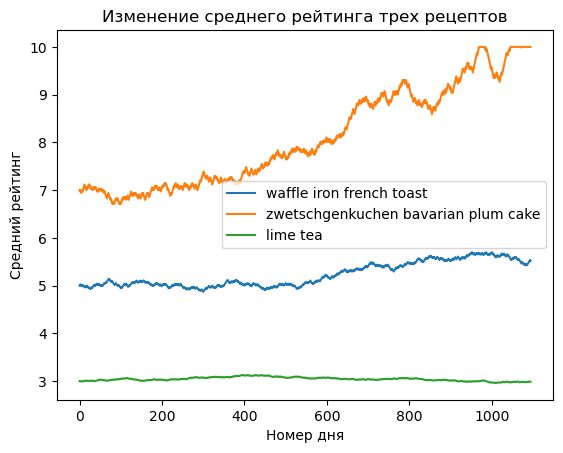

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# загрузка данных
ratings = np.load('average_ratings.npy')

# создание графика
plt.plot(ratings[0], label='waffle iron french toast')
plt.plot(ratings[1], label='zwetschgenkuchen bavarian plum cake')
plt.plot(ratings[2], label='lime tea')

# добавление подписей осей и заголовка графика
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

# добавление легенды
plt.legend()

# вывод графика
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


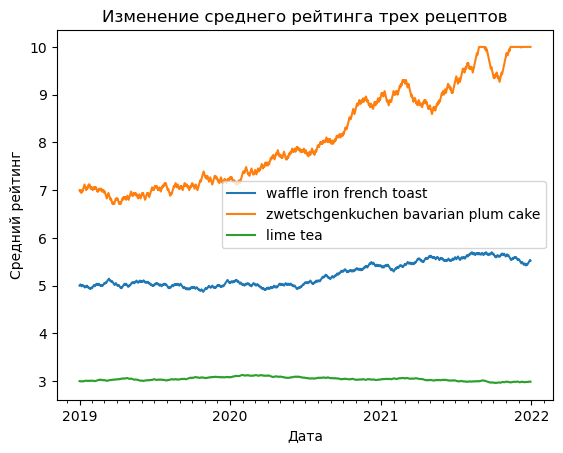

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# загрузка данных
ratings = np.load('average_ratings.npy')

# создание диапазона дат
start_date = '2019-01-01'
end_date = '2021-12-30'
dates = np.arange(np.datetime64(start_date), np.datetime64(end_date)+1)

# создание графика
fig, ax = plt.subplots()
ax.plot(dates, ratings[0], label='waffle iron french toast')
ax.plot(dates, ratings[1], label='zwetschgenkuchen bavarian plum cake')
ax.plot(dates, ratings[2], label='lime tea')

# настройка осей
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# добавление подписей осей и заголовка графика
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

# добавление легенды
plt.legend()

# вывод графика
plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

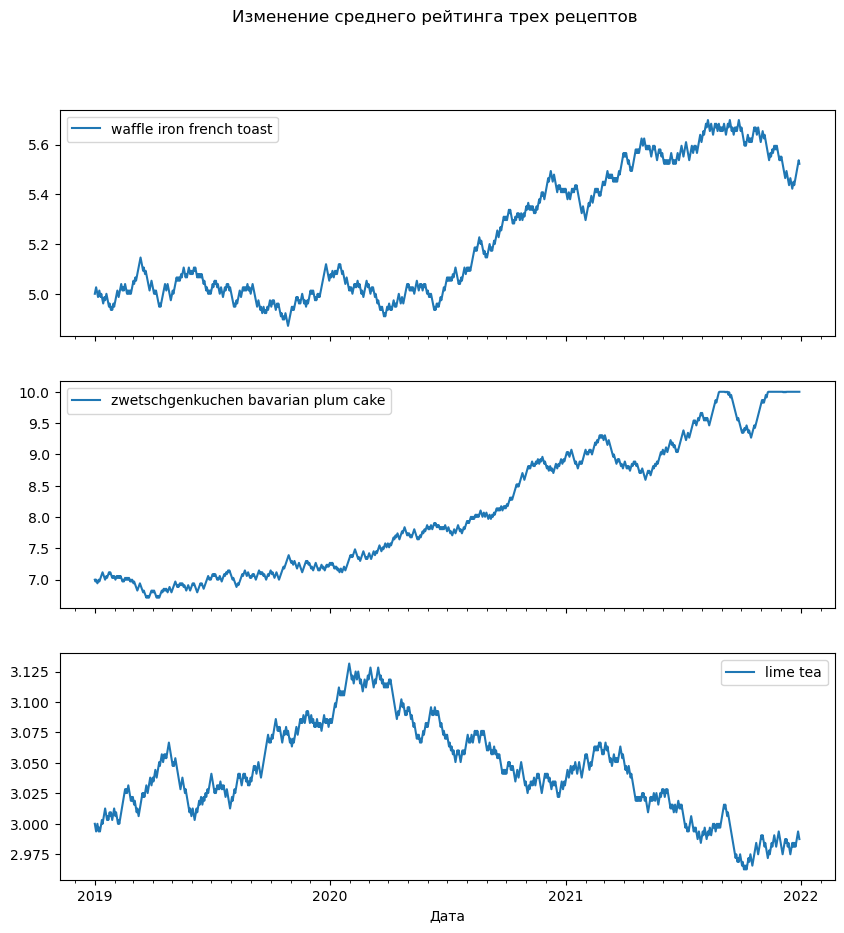

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# загрузка данных
ratings = np.load('average_ratings.npy')

# создание диапазона дат
start_date = '2019-01-01'
end_date = '2021-12-30'
dates = np.arange(np.datetime64(start_date), np.datetime64(end_date)+1)

# создание трех графиков
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10,10))
axs[0].plot(dates, ratings[0], label='waffle iron french toast')
axs[1].plot(dates, ratings[1], label='zwetschgenkuchen bavarian plum cake')
axs[2].plot(dates, ratings[2], label='lime tea')

# настройка осей
for ax in axs:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
axs[2].set_xlabel('Дата')
    
# добавление подписей осей и заголовка графика
fig.suptitle('Изменение среднего рейтинга трех рецептов')
    
# добавление легенды
for ax in axs:
    ax.legend()

# вывод графика
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


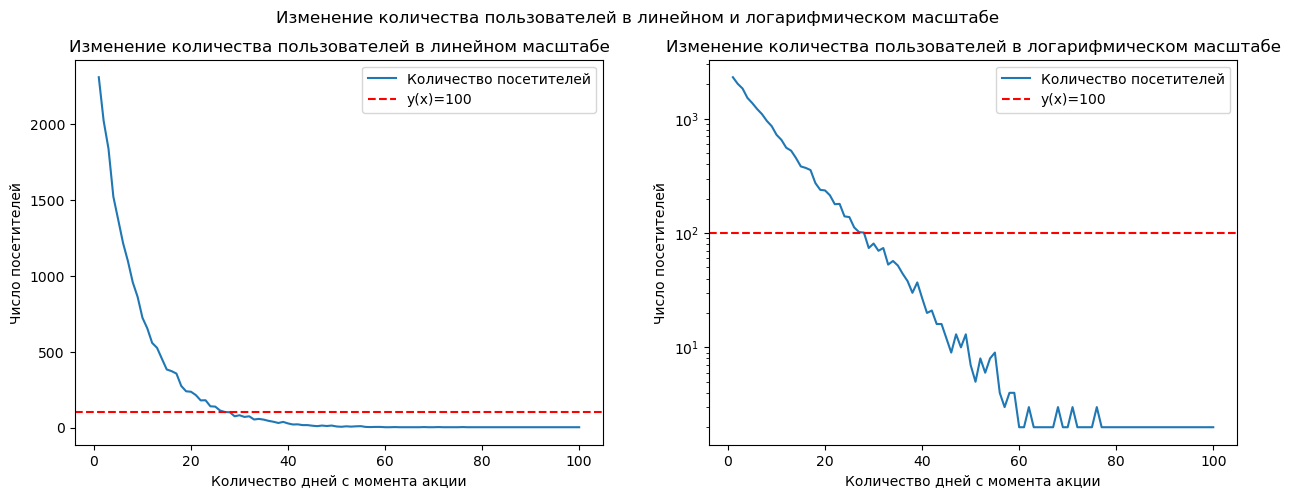

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [52]:
reviews = pd.read_csv('reviews_sample.csv')
recipes = pd.read_csv('recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [27]:
print(reviews.columns)
print(recipes.columns)

Index(['Unnamed: 0', 'user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')
Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'n_steps',
       'description', 'n_ingredients'],
      dtype='object')


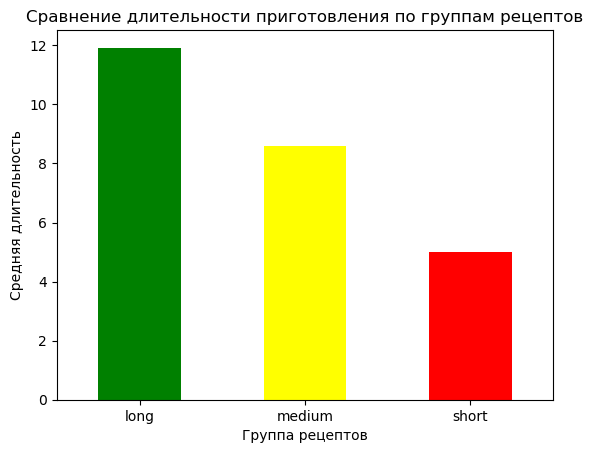

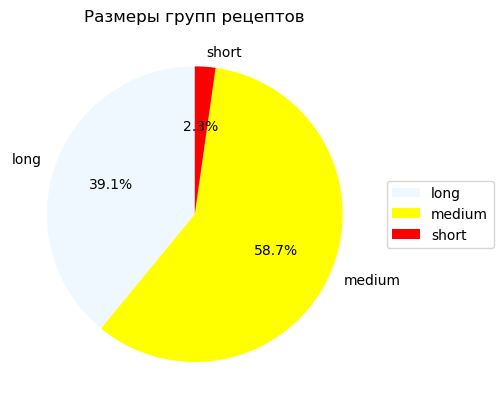

In [59]:
recipes = pd.read_csv('recipes_sample.csv')

# Добавляем столбец duration в таблицу recipes
recipes.loc[recipes['minutes'] < 5, 'duration'] = 'short'
recipes.loc[(recipes['minutes'] >= 5) & (recipes['minutes'] < 50), 'duration'] = 'medium'
recipes.loc[recipes['minutes'] >= 50, 'duration'] = 'long'

# Группируем рецепты по продолжительности приготовления и рассчитываем среднее количество шагов и размер группы
grouped_recipes = recipes.groupby('duration').agg({'n_steps': 'mean', 'name': 'size'}).rename(columns={'name': 'size'})

# Строим столбчатую диаграмму для среднего количества шагов
fig, ax = plt.subplots()
grouped_recipes['n_steps'].plot(kind='bar', rot=0, color=['green', 'yellow', 'red'], ax=ax)
ax.set_xlabel('Группа рецептов')
ax.set_ylabel('Средняя длительность')
ax.set_title('Сравнение длительности приготовления по группам рецептов')

# Строим круговую диаграмму для размера группы
fig2, ax2 = plt.subplots()
grouped_recipes['size'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'yellow', 'red'], ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Размеры групп рецептов')
ax2.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

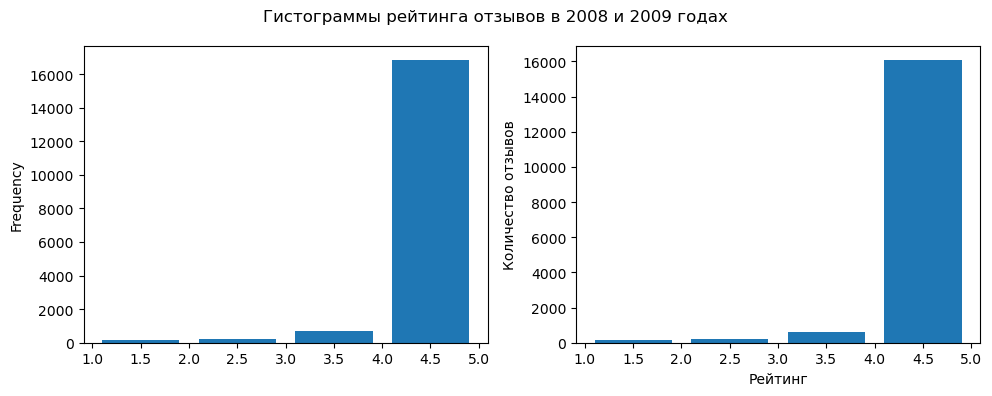

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
reviews[reviews['date'].str.contains('2008')]['rating'].plot.hist(ax=axs[0], bins=range(1, 6), rwidth=0.8)
reviews[reviews['date'].str.contains('2009')]['rating'].plot.hist(ax=axs[1], bins=range(1, 6), rwidth=0.8)
plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
plt.xlabel('Рейтинг')
plt.ylabel('Количество отзывов')
plt.tight_layout()

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

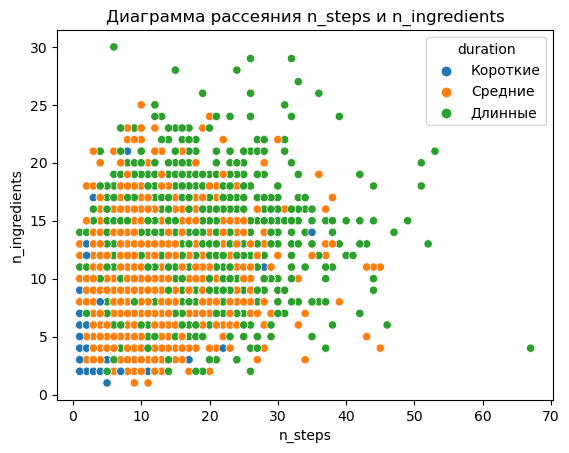

In [56]:
# Группировка данных
recipes['duration'] = pd.cut(recipes['minutes'], bins=[-1, 5, 50, float('inf')], labels=['Короткие', 'Средние', 'Длинные'])
# Построение диаграммы рассеяния
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='duration')
plt.title('Диаграмма рассеяния n_steps и n_ingredients')
plt.show()

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

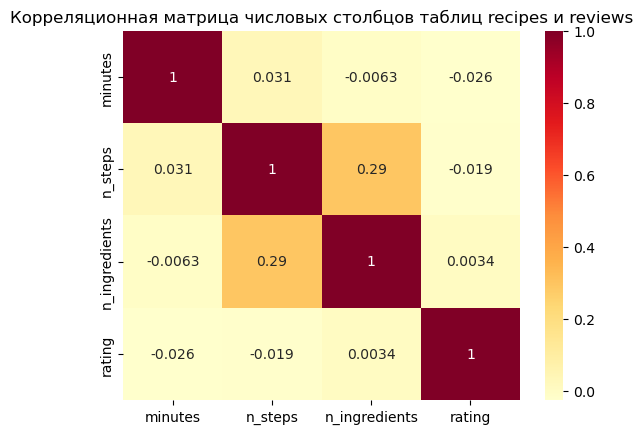

In [57]:
# Объединение таблиц
recipes = recipes.rename(columns={'id': 'recipe_id'})
reviews = reviews.rename(columns={'recipe_id': 'recipe_id'})

# объединение таблиц
data = pd.merge(recipes, reviews, on='recipe_id')

# выбор числовых столбцов
data_numeric = data[['minutes', 'n_steps', 'n_ingredients', 'rating']]

# Построение матрицы корреляции
corr_matrix = data_numeric.corr()

# Построение тепловой карты
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')
plt.show()